In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Read The Data

In [2]:
df = pd.read_csv('../../DATA/kaggle/gender-classification/Transformed Data Set - Sheet1.csv')
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


### Features :
- Fav Color
- Fav Music genre
- Fev Beverage
- Fav Soft
- Gender (label)

## Rename Columns 

In [3]:
df.columns = ['color', 'music','beverage','softdrink','label']
df.columns

Index(['color', 'music', 'beverage', 'softdrink', 'label'], dtype='object')

## Inspect the Data

In [4]:
df.count()

color        66
music        66
beverage     66
softdrink    66
label        66
dtype: int64

**Only 6 rows**

## Check Missing Values

In [5]:
df.isnull().sum()

color        0
music        0
beverage     0
softdrink    0
label        0
dtype: int64

**No missing Values**

## Encode the Data

In [6]:
from sklearn.preprocessing import LabelEncoder
le_color = LabelEncoder()
data = df
data['color'] = le_color.fit_transform(df.color.values)
le_music = LabelEncoder()
data['music'] = le_music.fit_transform(df.music.values)
le_beverage = LabelEncoder()
data['beverage'] = le_beverage.fit_transform(df.beverage.values)
le_softdrink = LabelEncoder()
data['softdrink'] = le_softdrink.fit_transform(df.softdrink.values)
le_label = LabelEncoder()
data['label'] = le_label.fit_transform(df.label.values)
data.head()

,color,music,beverage,softdrink,label
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0


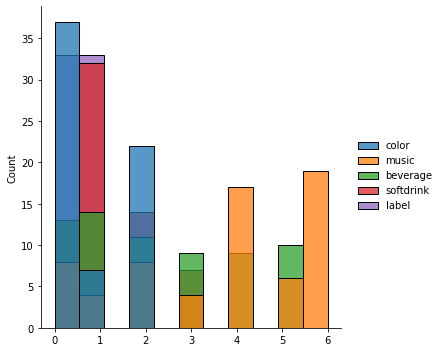

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.displot(data)

plt.show()

In [8]:
data['label'].value_counts()

0    33
1    33
Name: label, dtype: int64

**Balanced Data**

## Split Data into Train and Test

In [9]:
from sklearn.model_selection import train_test_split
Y = data['label']
X = data.drop(['label'],axis=1)
#X.head()
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42) # Split 20% test data

## Build Model 

### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)

LogisticRegression(random_state=42)

## Check on Training Data 

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
p_train_pred = model.predict_proba(X_train)
y_train_pred = model.predict(X_train)

conf_m_train = confusion_matrix(Y_train, y_train_pred)
report_train = classification_report(Y_train, y_train_pred)
print(report_train)

              precision    recall  f1-score   support

           0       0.55      0.62      0.58        26
           1       0.57      0.50      0.53        26

    accuracy                           0.56        52
   macro avg       0.56      0.56      0.56        52
weighted avg       0.56      0.56      0.56        52



## Evaluate on Test Data

In [12]:
p_test_pred = model.predict_proba(X_test)
y_test_pred = model.predict(X_test)

conf_m_train = confusion_matrix(Y_test, y_test_pred)
report_train = classification_report(Y_test, y_test_pred)
print(report_train)

              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.60      0.86      0.71         7

    accuracy                           0.64        14
   macro avg       0.68      0.64      0.63        14
weighted avg       0.67      0.64      0.63        14



## Try Random Forest Classifier 

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=5,random_state=42)
clf.fit(X_train, Y_train)


y_pred=clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(Y_train, y_pred))

Accuracy: 0.9230769230769231


### Try RF on Test Data

In [14]:
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.2857142857142857


# Notes
1. The data is too small. Only 66 instances. 
2. The data is balance and no need many preprocessing steps.